In [1]:
from sklearn.datasets import load_breast_cancer, load_boston, make_regression
import numpy as np
import pandas as pd
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

In [3]:
y = df[['label']]
X = df.drop(['label'], axis=1)

In [ ]:
%%time
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, train_size=0.8, random_state=42)

In [5]:
%%time
sns.displot(Xtrain)

CPU times: user 1min 40s, sys: 1.18 s, total: 1min 41s
Wall time: 1min 41s


Error in callback <function flush_figures at 0x13cf4c670> (for post_execute):


KeyboardInterrupt: 

In [6]:
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

/Users/macbookpro/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
lr.score(Xtest, ytest)

0.9649122807017544

/Users/macbookpro/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.956140350877193


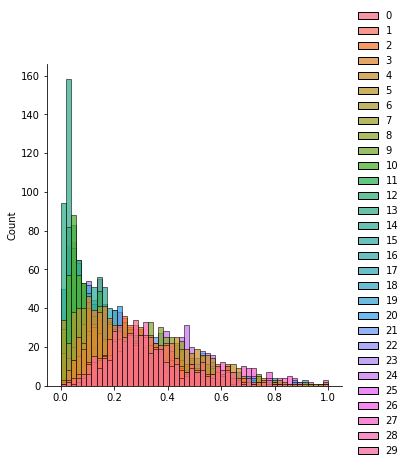

In [8]:
minmax = MinMaxScaler()
Xtrain_minmax = minmax.fit_transform(Xtrain)
lr = LogisticRegression()
lr.fit(Xtrain_minmax, ytrain)
Xtest_minmax = minmax.transform(Xtest)
print(lr.score(Xtest_minmax, ytest))
sns.displot(Xtrain_minmax)

/Users/macbookpro/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9824561403508771


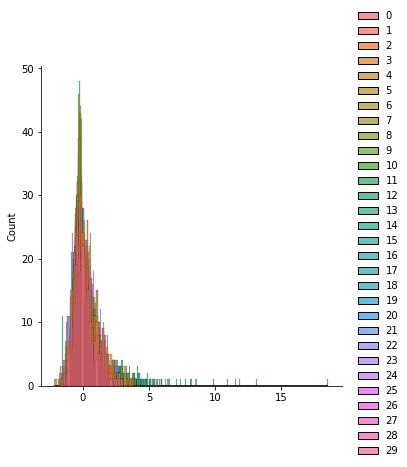

In [45]:
robust = RobustScaler()
Xtrain_robust = robust.fit_transform(Xtrain)
lr = LogisticRegression()
lr.fit(Xtrain_robust, ytrain)
Xtest_robust = robust.transform(Xtest)
print(lr.score(Xtest_robust, ytest))
sns.displot(Xtrain_robust)

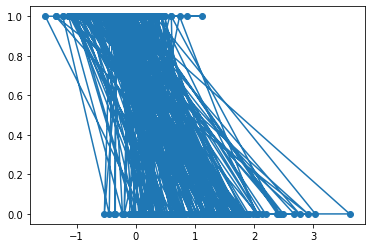

In [46]:
plt.scatter(Xtrain_robust[:, 0], ytrain)
plt.plot(Xtrain_robust[:, 0], lr.predict(Xtrain_robust))

/Users/macbookpro/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9824561403508771


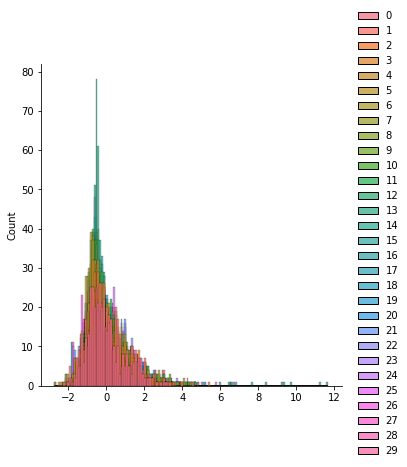

In [10]:
standard = StandardScaler()
Xtrain_standard = standard.fit_transform(Xtrain)
lr = LogisticRegression()
lr.fit(Xtrain_standard, ytrain)
Xtest_standard = standard.transform(Xtest)
print(lr.score(Xtest_standard, ytest))
sns.displot(Xtrain_standard)

/Users/macbookpro/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9649122807017544


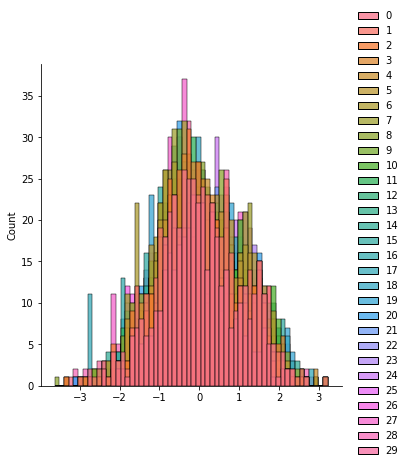

In [11]:
power = PowerTransformer()
Xtrain_power = power.fit_transform(Xtrain)
lr = LogisticRegression()
lr.fit(Xtrain_power, ytrain)
Xtest_power = power.transform(Xtest)
print(lr.score(Xtest_power, ytest))
sns.displot(Xtrain_power)

/Users/macbookpro/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7894736842105263


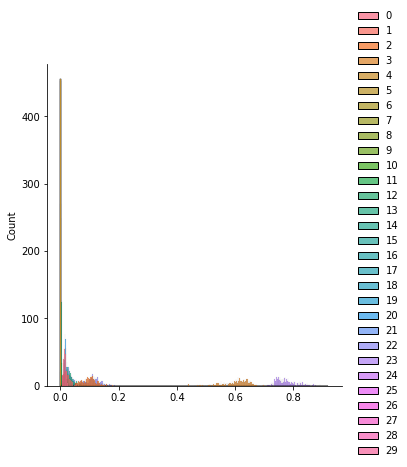

In [13]:
norm = Normalizer()
Xtrain_norm = norm.fit_transform(Xtrain)
lr = LogisticRegression()
lr.fit(Xtrain_norm, ytrain)
Xtest_norm = norm.transform(Xtest)
print(lr.score(Xtest_norm, ytest))
sns.displot(Xtrain_norm)

In [9]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

In [10]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
train, test = train_test_split(df)
y_cols = 'label'
x_cols = data.feature_names

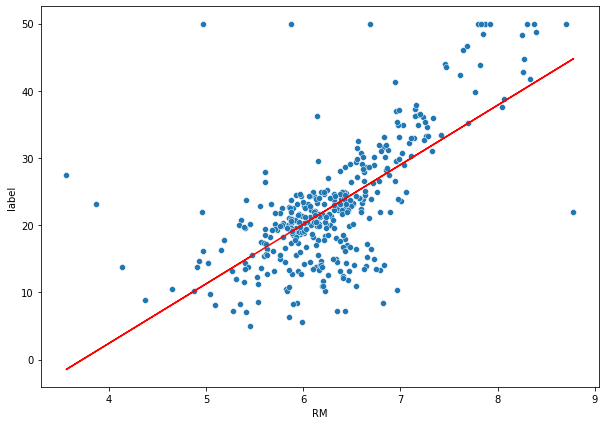

In [20]:
col_to_plot = 'RM'
lr = LinearRegression()
lr.fit(train[[col_to_plot]], train[y_cols])
plt.figure(figsize=(10, 7))
sns.scatterplot(data=train, x=col_to_plot, y='label')
plt.plot(train[col_to_plot], lr.predict(train[[col_to_plot]]), color='r')

In [2]:
reg = make_regression(n_samples=100000, n_features=1000, n_informative=100, n_targets=1, bias=5.0, effective_rank=None, tail_strength=0.1, noise=25, shuffle=True, coef=False, random_state=42)

In [3]:
%%time
col_to_plot = 0
lr = LinearRegression()
lr.fit(reg[0], reg[1])
# plt.figure(figsize=(10, 7))
# plt.scatter(reg[0], reg[1])
# plt.plot(reg[0], lr.predict(reg[0]), color='r')

CPU times: user 20.5 s, sys: 1.15 s, total: 21.6 s
Wall time: 7.83 s


LinearRegression()